<a href="https://colab.research.google.com/github/Venture-Coding/Linkedin_Learning/blob/main/NLP/Basic_NLG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [20]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.7.0


## Step 1: Create a corpus

In [21]:
#data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."
data = "Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of 'understanding' the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."

In [22]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split("\n")
print(corpus)

["natural language processing (nlp) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. the goal is a computer capable of 'understanding' the contents of documents, including the contextual nuances of the language within them. the technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation."]


## Step 2: Train the tokenizer and create word encoding dictionary

In [23]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'language': 2, 'and': 3, 'natural': 4, 'of': 5, 'in': 6, 'documents': 7, 'processing': 8, 'is': 9, 'a': 10, 'computer': 11, 'computers': 12, 'to': 13, 'as': 14, 'nlp': 15, 'subfield': 16, 'linguistics': 17, 'science': 18, 'artificial': 19, 'intelligence': 20, 'concerned': 21, 'with': 22, 'interactions': 23, 'between': 24, 'human': 25, 'particular': 26, 'how': 27, 'program': 28, 'process': 29, 'analyze': 30, 'large': 31, 'amounts': 32, 'data': 33, 'goal': 34, 'capable': 35, "'understanding'": 36, 'contents': 37, 'including': 38, 'contextual': 39, 'nuances': 40, 'within': 41, 'them': 42, 'technology': 43, 'can': 44, 'then': 45, 'accurately': 46, 'extract': 47, 'information': 48, 'insights': 49, 'contained': 50, 'well': 51, 'categorize': 52, 'organize': 53, 'themselves': 54, 'challenges': 55, 'frequently': 56, 'involve': 57, 'speech': 58, 'recognition': 59, 'understanding': 60, 'generation': 61}
62


## Step 3: Create N-gram sequence

In [24]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences, every sentence is converted to 2 word 3 word upto n-word phrases
        n_gram_sequence = tokens[:i+1] #the nth word of phrase becomes target variable and all words before the nth become features. Easy
        input_sequences.append(n_gram_sequence)


In [25]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        ) #pre padding, remember, cuz last word is 'label'.


## Step 4: Extract features and labels

In [26]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [28]:
#print(tokenizer.word_index['mud'])
print(X[0])
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Define the LSTM model

In [29]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 4s 36ms/step - loss: 4.1276 - accuracy: 0.0515
Epoch 2/500
4/4 [==============================] - 0s 35ms/step - loss: 4.1150 - accuracy: 0.0928
Epoch 3/500
4/4 [==============================] - 0s 36ms/step - loss: 4.1061 - accuracy: 0.0928
Epoch 4/500
4/4 [==============================] - 0s 36ms/step - loss: 4.0974 - accuracy: 0.0928
Epoch 5/500
4/4 [==============================] - 0s 37ms/step - loss: 4.0881 - accuracy: 0.0825
Epoch 6/500
4/4 [==============================] - 0s 36ms/step - loss: 4.0778 - accuracy: 0.0825
Epoch 7/500
4/4 [==============================] - 0s 35ms/step - loss: 4.0631 - accuracy: 0.0825
Epoch 8/500
4/4 [==============================] - 0s 36ms/step - loss: 4.0468 - accuracy: 0.0825
Epoch 9/500
4/4 [==============================] - 0s 35ms/step - loss: 4.0187 - accuracy: 0.0825
Epoch 10/500
4/4 [==============================] - 0s 36ms/step - loss: 3.9813 - accuracy: 0.0825
Epoch 11/500
4/4 [=

## Visualize metrics

In [30]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

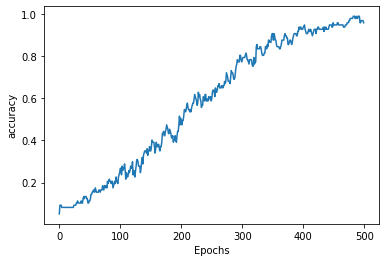

In [31]:
plot_metric(history, 'accuracy')

## Generate new text

In [33]:
seed_text = "Computers can learn human language."

##add number of words you want to predict
next_words = 50
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 
    ##predict the class using the trained model
	predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
        ##reference the predicted class with the vocabulary
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Computers can learn human language. processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of of natural language data the goal is a computer capable of of documents including the contextual


model.predict_classes() has been deprecated.  
np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).

Upon reading both the ouputs for Harry Potter's paragraph and NLP Wikipedia's paragraph, the model is definitely able to generate sequentially suitable text data, as taught. Let's try one more input para.

In [36]:
data = "A month ago, I had a great conversation with a few of awesome friends where we talked about the importance of a belief system and how it manifests in our life. That subject instantly reminded me of this book during the conversation, one that I read long time ago, and ultimately led me take the book out from the bookshelf and read again. Whether it’s called as the confirmation bias or the workings of the subconscious mind, our conversation ended with the conclusion with the girls’ win: ‘Things happen to those who believe.’ I was very surprised and  impressed by my female friend who possessed this wisdom probably without knowing the workings of the subconscious mind nor the existence of this book. ‘Miracles happen to those who believe in miracles.’ says the author in this book. My favorite author Paulo Coelho also frequently quotes this phrase. ‘Be careful what you wish for, it might just come true.’ Another good example emphasizing the power of the subconscious mind. In my previous post, I have talked about my annual rituals related with books. No one can prove reading certain types of books would bring certain experiences, and doing some rituals might result in physical manifestations. Right. Rituals don’t have any linear or direct relationship with the result. But what I enjoy about the rituals is not about the actual result but the act itself as a tool for planting seeds in my subconscious mind. In other words, I believe the ritual as an intentional physical act functions to reinforce my mind – both conscious and subconscious. That’s the virtue I find. So, why not doing some planning and organizing for the new year for myself? I write down my goals and intentions and contemplate on my wishes and positive growth for the whole year. These all would imprint strong images on my subconscious mind throughout the year. Also, the winter, when the sun hides away for a longer time from us, is a good time to plant mental seeds so that we can see the physical sprouts in the spring time, and grow them during the summer, and harvest them during the autumn. This book is another go-to book in my bookshelf. I always go back when I need more strengths and to remind myself of valuable insights the book provides. Full of guidance for harnessing the power of your mind and for applying them for various dimensions in life, this book will help you reap the rewards in the form of health, wealth and success in the end. Also, the author bases much of his philosophy on James Allen whose book such as 'As a Man Thinketh' is a well-known classic. This is another great point in enjoying the book with its easy and plain language."

tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split(".")

tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

word_index = tokenizer.word_index #word encoded dictionary
#print(vocab_size)

##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):  # create n-gram sequences, every sentence is converted to 2 word 3 word upto n-word phrases
        n_gram_sequence = tokens[:i+1] #the nth word of phrase becomes target variable and all words before the nth become features. Easy
        input_sequences.append(n_gram_sequence)


##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        ) #pre padding, remember, cuz last word is 'label'.

X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                tf.keras.layers.Dense(vocab_size, activation='softmax')
])


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
14/14 [==============================] - 4s 22ms/step - loss: 5.4980 - accuracy: 0.0157
Epoch 2/500
14/14 [==============================] - 0s 21ms/step - loss: 5.4696 - accuracy: 0.0538
Epoch 3/500
14/14 [==============================] - 0s 21ms/step - loss: 5.3238 - accuracy: 0.0874
Epoch 4/500
14/14 [==============================] - 0s 22ms/step - loss: 5.1101 - accuracy: 0.0830
Epoch 5/500
14/14 [==============================] - 0s 21ms/step - loss: 5.0241 - accuracy: 0.0830
Epoch 6/500
14/14 [==============================] - 0s 22ms/step - loss: 4.9967 - accuracy: 0.0830
Epoch 7/500
14/14 [==============================] - 0s 21ms/step - loss: 4.9821 - accuracy: 0.0830
Epoch 8/500
14/14 [==============================] - 0s 20ms/step - loss: 4.9680 - accuracy: 0.0830
Epoch 9/500
14/14 [==============================] - 0s 21ms/step - loss: 4.9550 - accuracy: 0.0830
Epoch 10/500
14/14 [==============================] - 0s 21ms/step - loss: 4.9361 - accuracy: 0.0830

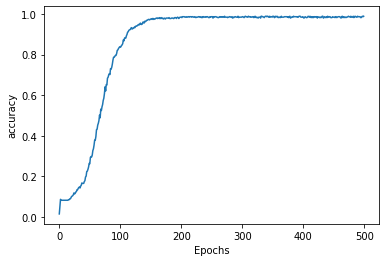

In [38]:
plot_metric(history, 'accuracy')


In [40]:
seed_text = "It is good to believe in miracles."

##add number of words you want to predict
next_words = 20
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 
    ##predict the class using the trained model
	predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
        ##reference the predicted class with the vocabulary
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

It is good to believe in miracles. the power of your mind and for and for this book and ultimately led take the book out take the


Model performs okay-ish on all 3 input data paragraphs. Starts well and then loses context as well as understanding of where it's headed.  
However, we still need to do some work to be able to teach the model some context as well. Until then, adios!